In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import datetime



In [25]:
data = pd.read_csv("https://raw.githubusercontent.com/KohSiXing/BT4012-Fraud-Analytics/master/Fraud_Data.csv")
ip_country = pd.read_csv("https://raw.githubusercontent.com/KohSiXing/BT4012-Fraud-Analytics/master/IpAddress_to_Country.csv")

Reading Data

In [26]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [27]:
ip_country

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [28]:
f_data = data[data["class"] == 1]
f_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1
25,59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1.752167e+09,1
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1
59,345865,2015-02-01 05:59:23,2015-02-20 08:09:10,36,FKQPZUELCRKBL,SEO,IE,M,30,2.740590e+09,1
...,...,...,...,...,...,...,...,...,...,...,...
151082,305464,2015-01-07 09:06:55,2015-01-07 09:06:56,90,TVYSUZLTILQQN,SEO,IE,M,34,3.067794e+09,1
151099,115473,2015-01-01 07:26:14,2015-01-01 07:26:15,61,ZRHCEVZHNIBJH,Direct,IE,M,24,3.003296e+09,1
151103,5557,2015-01-04 23:03:04,2015-01-04 23:03:05,27,AWFGZTEHXMWEJ,Direct,Chrome,M,39,3.306999e+09,1
151104,252360,2015-01-04 09:40:44,2015-01-04 09:40:45,20,GSEYHMCBONPHK,Ads,IE,F,39,2.698870e+09,1


Bar Chart - Shows distribution of browsers used by all users

In [29]:
browsers = pd.DataFrame(data.browser.value_counts()).reset_index()
browsers.columns = ["Browser","Count"]
browsers

,Browser,Count
0,Chrome,61432
1,IE,36727
2,Safari,24667
3,FireFox,24610
4,Opera,3676


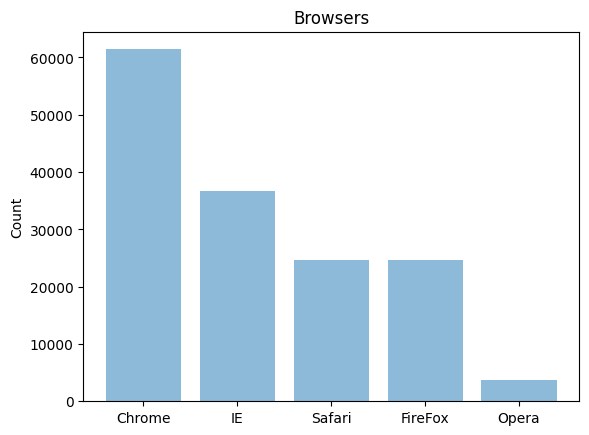

In [30]:
plt.bar(browsers.Browser, browsers.Count, align='center', alpha=0.5)
plt.ylabel('Count')
plt.title('Browsers')

plt.show()

Bar Chart - Shows distribution of browsers used by fraud users

In [31]:
browsers = pd.DataFrame(f_data.browser.value_counts()).reset_index()
browsers.columns = ["Browser","Count"]
browsers

,Browser,Count
0,Chrome,6069
1,IE,3187
2,FireFox,2342
3,Safari,2225
4,Opera,328


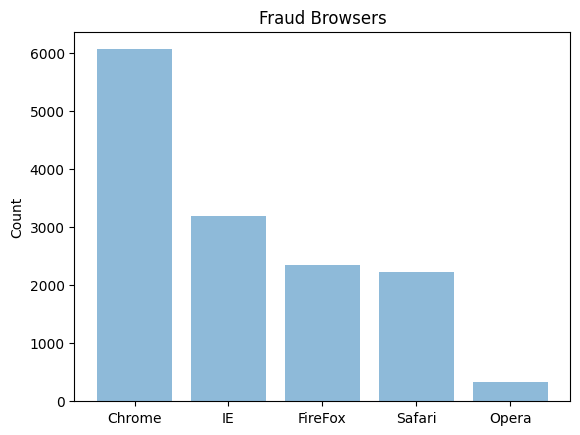

In [32]:
plt.bar(browsers.Browser, browsers.Count, align='center', alpha=0.5)
plt.ylabel('Count')
plt.title('Fraud Browsers')

plt.show()

In [33]:
pd.to_datetime(f_data["purchase_time"]) - pd.to_datetime(f_data["signup_time"])

2         0 days 00:00:01
24        0 days 00:00:01
25       11 days 02:41:10
29        0 days 00:00:01
59       19 days 02:09:47
               ...       
151082    0 days 00:00:01
151099    0 days 00:00:01
151103    0 days 00:00:01
151104    0 days 00:00:01
151107   60 days 21:27:13
Length: 14151, dtype: timedelta64[ns]

In [34]:
f_data["time"] = pd.DataFrame(pd.to_datetime(f_data["purchase_time"]) - pd.to_datetime(f_data["signup_time"])).astype(str)
f_data["time"] = f_data["time"].apply(lambda x : x[-8:])
f_data["time"]

C:\Users\eliga\AppData\Local\Temp\ipykernel_5668\3099623630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data["time"] = pd.DataFrame(pd.to_datetime(f_data["purchase_time"]) - pd.to_datetime(f_data["signup_time"])).astype(str)
C:\Users\eliga\AppData\Local\Temp\ipykernel_5668\3099623630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data["time"] = f_data["time"].apply(lambda x : x[-8:])


2         00:00:01
24        00:00:01
25        02:41:10
29        00:00:01
59        02:09:47
            ...   
151082    00:00:01
151099    00:00:01
151103    00:00:01
151104    00:00:01
151107    21:27:13
Name: time, Length: 14151, dtype: object

In [35]:
data["time"] = pd.DataFrame(pd.to_datetime(data["purchase_time"]) - pd.to_datetime(data["signup_time"])).astype(str)
data["time"] = data["time"].apply(lambda x : x[-8:])
data["time"] = pd.to_datetime(data['time'],format= '%H:%M:%S' ).dt.time
data["time"]

0         03:51:22
1         04:59:04
2         00:00:01
3         16:41:25
4         11:31:01
            ...   
151107    21:27:13
151108    18:41:10
151109    08:00:16
151110    13:28:39
151111    19:01:33
Name: time, Length: 151112, dtype: object

In [36]:
f_data["days"] = (pd.to_datetime(f_data["purchase_time"]) - pd.to_datetime(f_data["signup_time"])).dt.days
f_data["days"]

C:\Users\eliga\AppData\Local\Temp\ipykernel_5668\3366980390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data["days"] = (pd.to_datetime(f_data["purchase_time"]) - pd.to_datetime(f_data["signup_time"])).dt.days


2          0
24         0
25        11
29         0
59        19
          ..
151082     0
151099     0
151103     0
151104     0
151107    60
Name: days, Length: 14151, dtype: int64

In [37]:
f_data[(f_data["days"] == 0) & (f_data["time"] < "00:00:10")]

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time,days
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,00:00:01,0
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,00:00:01,0
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,00:00:01,0
64,181004,2015-01-07 17:45:16,2015-01-07 17:45:17,10,WETYPHOQVLWMK,Ads,FireFox,M,36,2.293333e+09,1,00:00:01,0
77,392706,2015-01-07 08:15:53,2015-01-07 08:15:54,65,VRYLIRAQJIIIE,SEO,Opera,F,30,1.213105e+09,1,00:00:01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151036,330098,2015-01-03 12:52:15,2015-01-03 12:52:16,38,EZENSUHMPLOIW,Ads,Chrome,M,27,2.152700e+08,1,00:00:01,0
151082,305464,2015-01-07 09:06:55,2015-01-07 09:06:56,90,TVYSUZLTILQQN,SEO,IE,M,34,3.067794e+09,1,00:00:01,0
151099,115473,2015-01-01 07:26:14,2015-01-01 07:26:15,61,ZRHCEVZHNIBJH,Direct,IE,M,24,3.003296e+09,1,00:00:01,0
151103,5557,2015-01-04 23:03:04,2015-01-04 23:03:05,27,AWFGZTEHXMWEJ,Direct,Chrome,M,39,3.306999e+09,1,00:00:01,0


In [38]:
ip_country.upper_bound_ip_address.astype('float')
ip_country.lower_bound_ip_address.astype('float')

def ip_add_to_country(ip):
  try:
    return ip_country.country[(ip_country.lower_bound_ip_address < ip)                            
                                & 
                                (ip_country.upper_bound_ip_address > ip)].iloc[0]
  except:
    return "NA"

f_data["country"] = f_data.ip_address.apply(ip_add_to_country)
f_data

C:\Users\eliga\AppData\Local\Temp\ipykernel_5668\2771964364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_data["country"] = f_data.ip_address.apply(ip_add_to_country)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time,days,country
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,00:00:01,0,United States
24,171711,2015-01-11 01:51:15,2015-01-11 01:51:16,52,YPLQGKBAAULUV,Direct,IE,F,35,1.120619e+09,1,00:00:01,0,United States
25,59780,2015-01-04 22:32:33,2015-01-16 01:13:43,31,WUMOBGUCBOXPO,SEO,FireFox,M,36,1.752167e+09,1,02:41:10,11,United States
29,151705,2015-01-07 03:44:53,2015-01-07 03:44:54,48,URHCRIXOMLJMH,SEO,Chrome,F,27,2.836025e+09,1,00:00:01,0,United States
59,345865,2015-02-01 05:59:23,2015-02-20 08:09:10,36,FKQPZUELCRKBL,SEO,IE,M,30,2.740590e+09,1,02:09:47,19,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151082,305464,2015-01-07 09:06:55,2015-01-07 09:06:56,90,TVYSUZLTILQQN,SEO,IE,M,34,3.067794e+09,1,00:00:01,0,Korea Republic of
151099,115473,2015-01-01 07:26:14,2015-01-01 07:26:15,61,ZRHCEVZHNIBJH,Direct,IE,M,24,3.003296e+09,1,00:00:01,0,Chile
151103,5557,2015-01-04 23:03:04,2015-01-04 23:03:05,27,AWFGZTEHXMWEJ,Direct,Chrome,M,39,3.306999e+09,1,00:00:01,0,Tunisia
151104,252360,2015-01-04 09:40:44,2015-01-04 09:40:45,20,GSEYHMCBONPHK,Ads,IE,F,39,2.698870e+09,1,00:00:01,0,Belgium


In [39]:
countries = f_data['country'].unique()
print(len(countries))
countries

110


array(['United States', 'France', 'NA', 'Iran (ISLAMIC Republic Of)',
       'United Kingdom', 'Taiwan; Republic of China (ROC)', 'Hong Kong',
       'Canada', 'Israel', 'China', 'Malaysia', 'Greece', 'Japan',
       'Italy', 'Korea Republic of', 'Belgium', 'Viet Nam', 'Netherlands',
       'Poland', 'Russian Federation', 'Brazil', 'Norway', 'Chile',
       'Algeria', 'Spain', 'Germany', 'Croatia (LOCAL Name: Hrvatska)',
       'Tunisia', 'European Union', 'Sweden', 'Denmark', 'Turkey',
       'Czech Republic', 'India', 'Bolivia', 'South Africa', 'Argentina',
       'Egypt', 'Mexico', 'Trinidad and Tobago', 'Switzerland',
       'Turkmenistan', 'Hungary', 'Ecuador', 'Australia', 'Kuwait',
       'United Arab Emirates', 'Colombia', 'Ukraine', 'Peru', 'Ireland',
       'Kazakhstan', 'Latvia', 'Venezuela', 'New Zealand', 'Finland',
       'Lithuania', 'Belarus', 'Armenia', 'Sri Lanka', 'Indonesia',
       'Nigeria', 'Saudi Arabia', 'Philippines', 'Romania', 'Seychelles',
       'Pakistan'

United States        5551
NA                   1883
China                1043
Japan                 715
United Kingdom        477
Korea Republic of     380
Canada                348
France                300
Brazil                270
Germany               262
Name: country, dtype: int64


<AxesSubplot:>

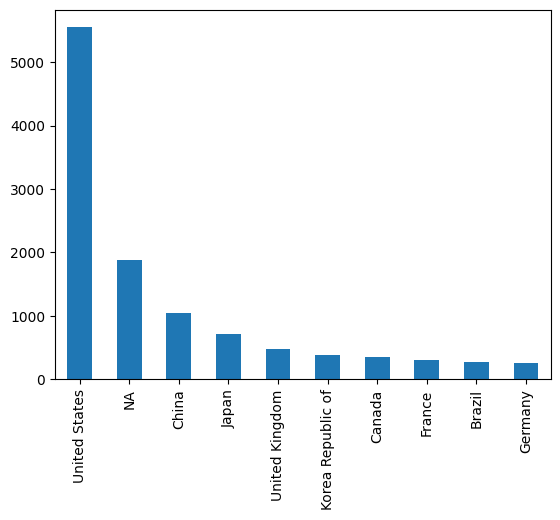

In [40]:
country_filtered = f_data.country.value_counts()[f_data.country.value_counts() > 200]
print(country_filtered)
country_filtered.plot.bar()

In [41]:
ip_country.upper_bound_ip_address.astype('float')
ip_country.lower_bound_ip_address.astype('float')

def ip_add_to_country(ip):
  try:
    return ip_country.country[(ip_country.lower_bound_ip_address < ip)                            
                                & 
                                (ip_country.upper_bound_ip_address > ip)].iloc[0]
  except:
    return "NA"

data["country"] = data.ip_address.apply(ip_add_to_country)
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,time,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,03:51:22,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,04:59:04,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,00:00:01,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,16:41:25,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,11:31:01,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,21:27:13,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,18:41:10,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,08:00:16,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,13:28:39,United States


<AxesSubplot:>

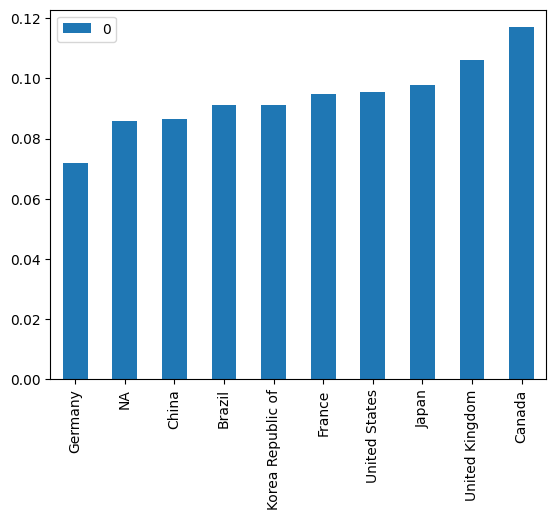

In [42]:
dic = {}
for country in country_filtered.index:
  fraud_counts = len(data[(data['country'] == country) & (data['class'] == 1)])
  total_counts = len(data[data['country'] == country])
  dic[country] = [fraud_counts/total_counts]

perc_fraud = pd.DataFrame(dic)
perc_fraud = perc_fraud.T
perc_fraud = perc_fraud.sort_values(by=[0])
perc_fraud.plot.bar()


In [43]:
risk_country = pd.DataFrame(data.groupby(by="country").mean()["class"].sort_values(ascending = False))
risk_country["risk_country"] = risk_country["class"].apply(lambda x:"High Risk" if x > 0.25 else "Medium Risk" if x > 0.10 else "Low Risk")
data = data.merge(risk_country.drop("class",axis=1),left_on='country', right_on = 'country')

In [44]:
 from sklearn.preprocessing import OneHotEncoder
 enc=OneHotEncoder()

 enc_df = pd.DataFrame(enc.fit_transform(data[['country']]).toarray())
 data = data.join(enc_df)
 data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,172,173,174,175,176,177,178,179,180,181
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,7.289345e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2.097968e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3.277722e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
151108,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1.505370e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151109,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3.314912e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151110,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3.412259e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
from scipy.stats import chi2_contingency
CrosstabResult=pd.crosstab(index=data['country'],columns=data['risk_country'])
print(CrosstabResult)
ChiSqResult = chi2_contingency(CrosstabResult)
ChiSqResult[1]

risk_country           High Risk  Low Risk  Medium Risk
country                                                
Afghanistan                    0         0            6
Albania                        0        13            0
Algeria                        0         0          122
Angola                         0        24            0
Antigua and Barbuda            0         3            0
...                          ...       ...          ...
Viet Nam                       0       550            0
Virgin Islands (U.S.)          3         0            0
Yemen                          0         1            0
Zambia                         0        10            0
Zimbabwe                       0         6            0

[182 rows x 3 columns]


0.0

In [46]:
data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,172,173,174,175,176,177,178,179,180,181
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,7.289345e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2.097968e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3.277722e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
151108,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1.505370e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151109,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3.314912e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151110,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3.412259e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Correlation Matrix

In [47]:
df_corr = data.copy()

df_corr['Chrome'] = [1 if x == 'Chrome' else 0 for x in df_corr['browser']]
df_corr['Opera'] = [1 if x == 'Opera' else 0 for x in df_corr['browser']]
df_corr['Safari'] = [1 if x == 'Safari' else 0 for x in df_corr['browser']]
df_corr['IE'] = [1 if x == 'IE' else 0 for x in df_corr['browser']]
df_corr['FireFox'] = [1 if x == 'FireFox' else 0 for x in df_corr['browser']]


df_corr['SEO'] = [1 if x == 'SEO' else 0 for x in df_corr['source']]
df_corr['Ads'] = [1 if x == 'Ads' else 0 for x in df_corr['source']]
df_corr['Direct'] = [1 if x == 'Direct' else 0 for x in df_corr['source']]

df_corr['High_Risk'] = [1 if x == 'High Risk' else 0 for x in df_corr['risk_country']]
df_corr['Medium_Risk'] = [1 if x == 'Medium Risk' else 0 for x in df_corr['risk_country']]
df_corr['Low_Risk'] = [1 if x == 'Low Risk' else 0 for x in df_corr['risk_country']]


df_corr = df_corr.drop(['class'], axis = 1)
df_corr


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,Opera,Safari,IE,FireFox,SEO,Ads,Direct,High_Risk,Medium_Risk,Low_Risk
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0,0,0,0,1,0,0,0,0,1
1,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,...,0,0,0,0,0,0,1,0,0,1
2,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,...,0,0,0,0,0,0,1,0,0,1
3,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,7.289345e+08,...,0,0,0,0,0,1,0,0,0,1
4,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2.097968e+09,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3.277722e+09,...,0,0,1,0,1,0,0,0,0,1
151108,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1.505370e+09,...,0,0,0,0,0,1,0,0,0,1
151109,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3.314912e+09,...,0,0,0,1,0,1,0,0,0,1
151110,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3.412259e+09,...,0,0,0,1,1,0,0,0,0,1


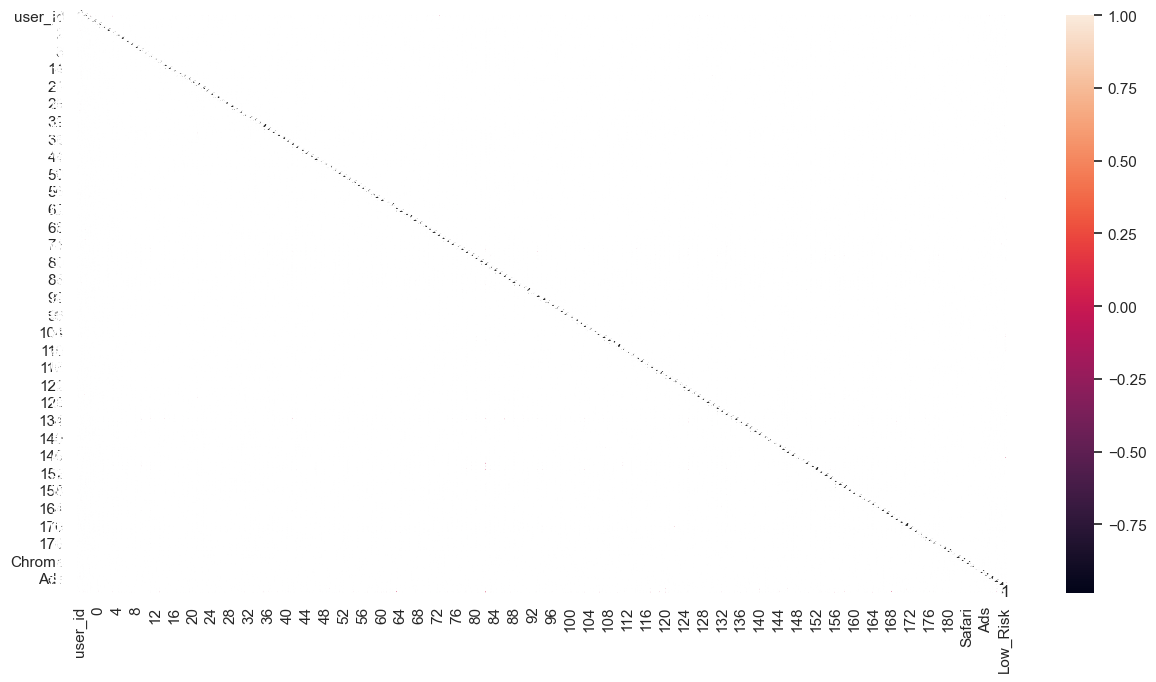

In [48]:
sns.set(rc={'figure.figsize':(15,7.5)})

corrMatrix = df_corr.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [49]:
dataSB = data[["source", "browser"]]
dataSB["results"] = 1 
dataSB

C:\Users\eliga\AppData\Local\Temp\ipykernel_5668\2969516744.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSB["results"] = 1


,source,browser,results
0,SEO,Chrome,1
1,Direct,Chrome,1
2,Direct,Chrome,1
3,Ads,Chrome,1
4,SEO,FireFox,1
...,...,...,...
151107,SEO,IE,1
151108,Ads,Chrome,1
151109,Ads,FireFox,1
151110,SEO,FireFox,1


In [50]:
dataSB.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            151102, 151103, 151104, 151105, 151106, 151107, 151108, 151109,
            151110, 151111],
           dtype='int64', length=151112)

In [51]:
pivotT = pd.pivot_table(dataSB,index = dataSB.index, columns='browser', values = "results", fill_value=0)
pivotT



browser,Chrome,FireFox,IE,Opera,Safari
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
151107,0,0,1,0,0
151108,1,0,0,0,0
151109,0,1,0,0,0
151110,0,1,0,0,0


In [52]:
pivotT2 = pd.pivot_table(dataSB, index = dataSB.index, columns='source', values = "results", fill_value=0)
pivotT2

source,Ads,Direct,SEO
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
...,...,...,...
151107,0,0,1
151108,1,0,0
151109,1,0,0
151110,0,0,1


In [53]:
final_df = pivotT.merge(pivotT2, left_on = pivotT.index, right_on = pivotT2.index)
final_df = final_df.drop(columns=["key_0"])
final_df

,Chrome,FireFox,IE,Opera,Safari,Ads,Direct,SEO
0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
151107,0,0,1,0,0,0,0,1
151108,1,0,0,0,0,1,0,0
151109,0,1,0,0,0,1,0,0
151110,0,1,0,0,0,0,0,1


In [54]:
arr = []

for x in range(0,5):
   arr.append([])
   for y in range(5,len(final_df.columns)):
       # If x is equals to y, result will be one
       if x != y:
            results = np.corrcoef(final_df[final_df.columns[x]], final_df[final_df.columns[y]]) 
            arr[x].append(abs(results[0][1]))
       else:
           results = 1
           arr[x].append(results)

corr_hm = pd.DataFrame(arr, columns=final_df.columns[5:8].values)
corr_hm = corr_hm.set_index(final_df.columns.values[0:5])
corr_hm

,Ads,Direct,SEO
Chrome,0.000953,0.009372,0.006734
FireFox,0.002925,0.007005,0.002826
IE,0.000764,0.000113,0.000855
Opera,0.003836,0.001045,0.004685
Safari,0.000943,0.005152,0.005166


<AxesSubplot:>

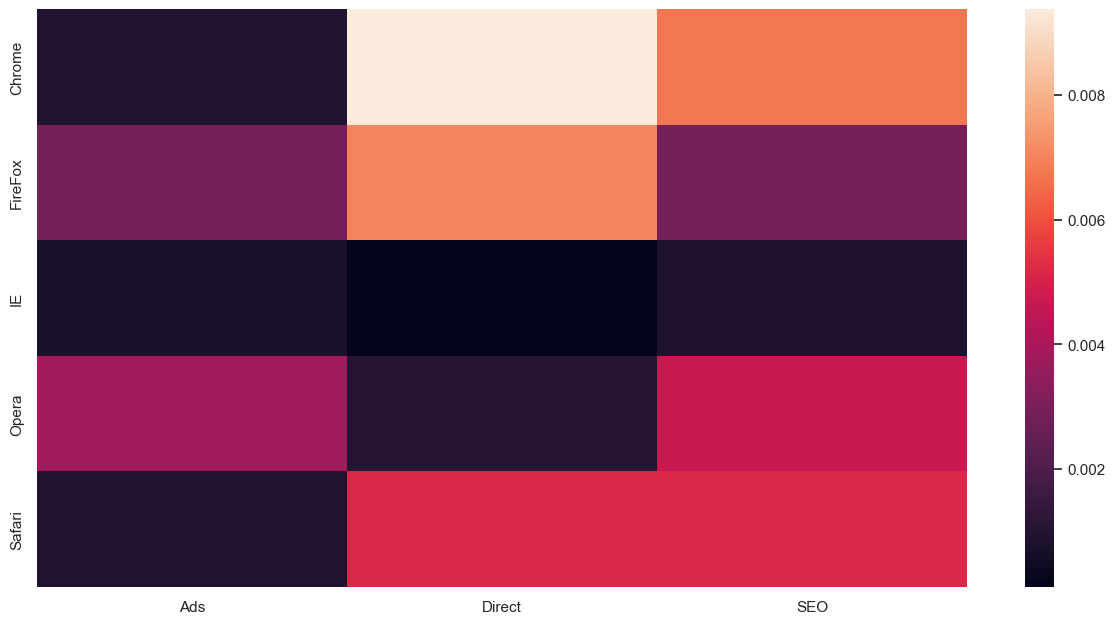

In [55]:
sns.heatmap(corr_hm)

Benford's Law for Purchase Value

In [56]:
df = data.copy()

In [57]:
df['purchase_value'] = df["purchase_value"].astype(str)
df['first_digit'] = df['purchase_value'].str.slice(0,1)
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,173,174,175,176,177,178,179,180,181,first_digit
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
2,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,7.289345e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2.097968e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3.277722e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
151108,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1.505370e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
151109,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3.314912e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
151110,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3.412259e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [58]:
# Add in a new column containing the probabilities in Benford's Law
temp = (df["first_digit"].value_counts()/len(df) * 100).reset_index().sort_values(by=["index"])

temp = temp.reset_index().sort_values(by=["index"])

# Benford Law
temp = pd.concat([temp, pd.DataFrame([(math.log10(1 + (1/x)) * 100) for x in range(1,10)])], axis = 1)


temp = temp.drop(columns = ["level_0"])

temp.columns = ["First Digit", "Actual Proportion", "Benford's Law"]

temp

,First Digit,Actual Proportion,Benford's Law
0,1,17.881439,30.103000
1,2,20.512600,17.609126
2,3,19.792604,12.493874
3,4,16.630711,9.691001
4,5,11.525888,7.918125
5,6,6.876357,6.694679
6,7,3.341230,5.799195
7,8,1.414845,5.115252
8,9,2.024326,4.575749


In [59]:
BFLawDF = pd.melt(temp, id_vars="First Digit", var_name="Type", value_name="Probability")
BFLawDF = BFLawDF.sort_values(['Type','First Digit', 'Probability'], ascending = [False, True, False])
BFLawDF

,First Digit,Type,Probability
9,1,Benford's Law,30.103000
10,2,Benford's Law,17.609126
11,3,Benford's Law,12.493874
12,4,Benford's Law,9.691001
13,5,Benford's Law,7.918125
14,6,Benford's Law,6.694679
15,7,Benford's Law,5.799195
16,8,Benford's Law,5.115252
17,9,Benford's Law,4.575749
0,1,Actual Proportion,17.881439


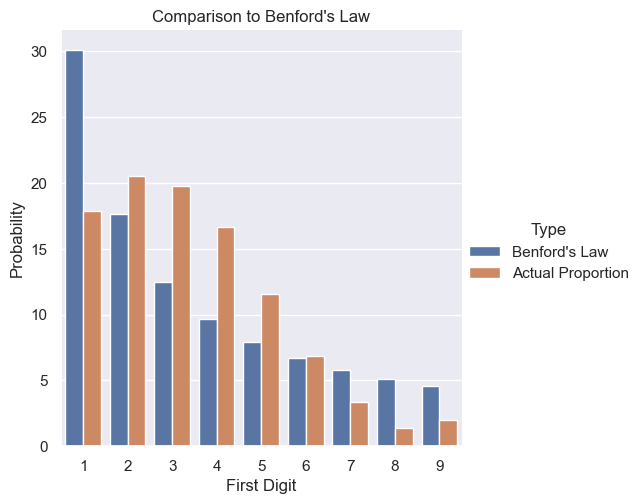

In [60]:
plot = sns.catplot(x='First Digit', y='Probability', hue='Type', data=BFLawDF, kind='bar').set(title = "Comparison to Benford's Law")
plot.fig.set_dpi(100)

Benford's Law for User Id

In [61]:
df = data.copy()

In [62]:
df['user_id'] = df["user_id"].astype(str)
df['first_digit'] = df['user_id'].str.slice(0,1)
df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,173,174,175,176,177,178,179,180,181,first_digit
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,243817,2015-02-13 18:16:05,2015-04-23 17:44:27,72,YIIEFBZUGEXNR,Direct,Chrome,F,32,2.521871e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,81113,2015-08-16 12:56:45,2015-08-24 05:00:54,52,BKQVBSSFGETUQ,Direct,Chrome,F,44,3.682312e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,28074,2015-07-03 09:31:29,2015-08-07 20:12:17,22,GQOICTLWVUQJR,Ads,Chrome,M,36,7.289345e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,135536,2015-05-03 22:40:07,2015-07-18 15:43:38,32,ITRXCOXKEQTAM,SEO,FireFox,M,37,2.097968e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,40206,2015-02-19 20:21:17,2015-04-04 02:46:18,26,CIWJPLNHZBBDV,SEO,IE,F,23,3.277722e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
151108,369153,2015-01-26 19:36:24,2015-02-03 02:14:54,12,ALALTFKYSIFXH,Ads,Chrome,M,34,1.505370e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
151109,209282,2015-03-27 22:02:49,2015-06-03 05:25:51,18,KUZBDYGURFVSN,Ads,FireFox,F,24,3.314912e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
151110,193457,2015-05-02 15:27:48,2015-05-14 20:59:33,45,UZBDAROVIEOPM,SEO,FireFox,M,30,3.412259e+09,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [63]:
# Add in a new column containing the probabilities in Benford's Law
temp = (df["first_digit"].value_counts()/len(df) * 100).reset_index().sort_values(by=["index"])

temp = temp.reset_index().sort_values(by=["index"])

# Benford Law
temp = pd.concat([temp, pd.DataFrame([(math.log10(1 + (1/x)) * 100) for x in range(1,10)])], axis = 1)


temp = temp.drop(columns = ["level_0"])

temp.columns = ["First Digit", "Actual Proportion", "Benford's Law"]

temp

,First Digit,Actual Proportion,Benford's Law
0,1,27.900498,30.103000
1,2,27.734396,17.609126
2,3,27.804542,12.493874
3,4,2.739028,9.691001
4,5,2.737043,7.918125
5,6,2.766160,6.694679
6,7,2.735719,5.799195
7,8,2.778072,5.115252
8,9,2.804542,4.575749


In [64]:
BFLawDF = pd.melt(temp, id_vars="First Digit", var_name="Type", value_name="Probability")
BFLawDF = BFLawDF.sort_values(['Type','First Digit', 'Probability'], ascending = [False, True, False])
BFLawDF

,First Digit,Type,Probability
9,1,Benford's Law,30.103000
10,2,Benford's Law,17.609126
11,3,Benford's Law,12.493874
12,4,Benford's Law,9.691001
13,5,Benford's Law,7.918125
14,6,Benford's Law,6.694679
15,7,Benford's Law,5.799195
16,8,Benford's Law,5.115252
17,9,Benford's Law,4.575749
0,1,Actual Proportion,27.900498


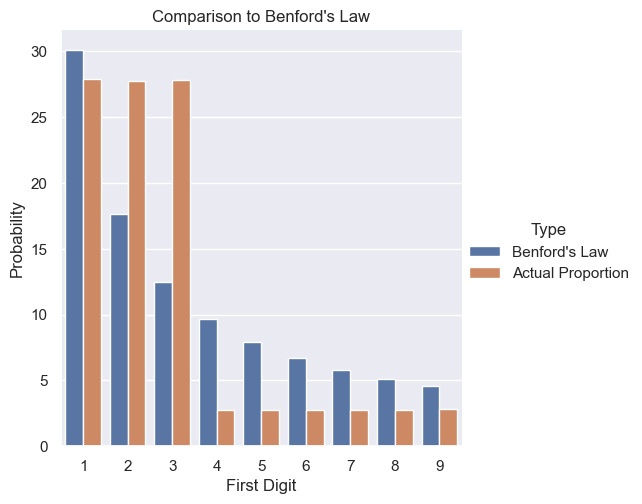

In [65]:
plot = sns.catplot(x='First Digit', y='Probability', hue='Type', data=BFLawDF, kind='bar').set(title = "Comparison to Benford's Law")
plot.fig.set_dpi(100)

Count number of transactions with multiple ip address but same device id

In [66]:
groupby_device_ip = data.groupby(['device_id', 'ip_address'])['ip_address'].count().to_frame()

# check user with same device but multiple ip addresses
groupby_device_ip[groupby_device_ip['ip_address']>1]

# check count of ip addresses for unique device id
groupby_device_ip.ip_address.unique()

array([ 1, 11,  8, 14,  7, 12,  9, 13, 10, 15,  6,  4, 17, 19, 16,  5,  3,
       18, 20,  2], dtype=int64)

Count the number of transactions from one device with little time difference

In [67]:
data['days'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).dt.days
data['time'] = (pd.to_datetime(data['purchase_time']) - pd.to_datetime(data['signup_time'])).astype(str).apply(lambda x : x[-8:])
# filter out df with short time difference
short_time_diff = data[(data['days'] == 0) & (data['time'] < '00:00:10')]
# count number of transactions for each device id with short time difference
short_time_diff = short_time_diff.groupby('device_id')['purchase_value'].count()
short_time_diff

device_id
AAAXXOZJRZRAO    10
AANYBGQSWHRTK     7
ADEDUDCYQMYTI    13
AENUQLGTUHYMS     6
AIGPGDVRDKOKT    11
                 ..
ZYHVSPGHWACPO     5
ZYZQZXBXADPST    15
ZZCAWCKYVMWNH     8
ZZFFPOVMCQVCG     6
ZZQPVRBHRMVYD    11
Name: purchase_value, Length: 760, dtype: int64

# NEW DATASET

In [68]:
import calendar
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [69]:
dataset = pd.read_csv("https://raw.githubusercontent.com/KohSiXing/BT4012-Fraud-Analytics/master/Fraud_Data.csv")
IP_table = pd.read_csv("https://raw.githubusercontent.com/KohSiXing/BT4012-Fraud-Analytics/master/IpAddress_to_Country.csv")

In [70]:
dataset["time"] = pd.DataFrame(pd.to_datetime(dataset["purchase_time"]) - pd.to_datetime(dataset["signup_time"])).astype(str)
dataset["time"] = dataset["time"].apply(lambda x : x[-8:])
dataset["time"] = pd.to_datetime(dataset['time'],format= '%H:%M:%S' ).dt.time
dataset["time"]

0         03:51:22
1         04:59:04
2         00:00:01
3         16:41:25
4         11:31:01
            ...   
151107    21:27:13
151108    18:41:10
151109    08:00:16
151110    13:28:39
151111    19:01:33
Name: time, Length: 151112, dtype: object

In [71]:
device_duplicates = pd.DataFrame(dataset.groupby(by = "device_id").device_id.count())  # at this moment, index column name and first column name both are equal to "device_id"
device_duplicates.rename(columns={"device_id": "freq_device"}, inplace=True)           # hence we need to replace the "device_id" column name
device_duplicates.reset_index(level=0, inplace= True)

In [72]:
IP_table.upper_bound_ip_address.astype("float")
IP_table.lower_bound_ip_address.astype("float")
dataset.ip_address.astype("float")

# function that takes an IP address as argument and returns country associated based on IP_table

def IP_to_country(ip) :
    try :
        return IP_table.country[(IP_table.lower_bound_ip_address < ip)                            
                                & 
                                (IP_table.upper_bound_ip_address > ip)].iloc[0]
    except IndexError :
        return "Unknown"     
dataset["IP_country"] = dataset.ip_address.apply(IP_to_country)

In [73]:
dataset = dataset.merge(device_duplicates, on= "device_id")

# --- 1 ---
# Categorisation column freq_device
# We see a clear correlation between freq_device and fraudulent activities. We are going to split freq_device in 7 categories
dataset['freq_device'] = dataset.freq_device.apply(lambda x :
                                                str(x) if x <5 else
                                                "5-10" if x>=5 and x<=10 else
                                                "11-15" if x>10 and x<=15 else
                                                "> 15")

# We convert signup_time and purchase_time en datetime

dataset.signup_time = pd.to_datetime(dataset.signup_time, format = '%Y-%m-%d %H:%M:%S')
dataset.purchase_time = pd.to_datetime(dataset.purchase_time, format = '%Y-%m-%d %H:%M:%S')

# We add features 

# --- 2 ---
# Column month
dataset["month_purchase"] = dataset.purchase_time.apply(lambda x: calendar.month_name[x.month])

# --- 3 ---
# Column week
dataset["weekday_purchase"] = dataset.purchase_time.apply(lambda x: calendar.day_name[x.weekday()])

# --- 4 ---
# Column hour_of_the_day
dataset["hour_of_the_day"] = dataset.purchase_time.apply(lambda x: x.hour)

# --- 5 ---
# Column seconds_since_signup
dataset["seconds_since_signup"]= (dataset.purchase_time - dataset.signup_time).apply(lambda x : x.total_seconds())

# --- 6 ---
# Column countries_from_device (ie. number of different countries per device_id)

# We flag devices that committed purchases from different countries
# First we groupby device_id and IP_country which will give us a DF with a sublist of country for each device_id
country_count = dataset.groupby(by =[ "device_id","IP_country"]).count().reset_index()

# Then we can count the number of different countries by device_id
country_count = pd.DataFrame(country_count.groupby(by="device_id").count().IP_country)

# Finally we can merge this to our main dataset
dataset = dataset.merge(country_count, left_on="device_id", right_index=True)
dataset.rename(columns={"IP_country_x": "IP_country" , "IP_country_y":"countries_from_device"}, inplace = True)

# --- 7 ---
# Column risk_country which classifies each country based on historical fraud rate from these countries

# We calculate the proportion of fraud by country
risk_country = pd.DataFrame(dataset.groupby(by="IP_country").mean()["class"].sort_values(ascending = False))

# We classify each country between Very High risk, High risk, Medium risk and low risk
risk_country["risk_country"] = risk_country["class"].apply(lambda x : 
                                                           "Very High risk" if x > 0.25 else
                                                           "High risk" if x > 0.05 else
                                                           "Medium risk" if x > 0.01 else
                                                           "Low risk")
                                                
# We merge with dataset
dataset = dataset.merge(risk_country.drop("class", axis = 1), left_on= "IP_country", right_index = True)

# --- 8 ---
# Column "quick_purchase" : categorise time between sign_up and purchase
dataset["quick_purchase"] = dataset.seconds_since_signup.apply(lambda x : 1 if x < 30 else 0)

# --- 9 ---
# Column freq_same_purchase : indicates how many times a given device_id purchased an item of the same value

# We generate a table indicating for each line if the couple device_id / purchase_value has duplicates
duplicate = dataset.duplicated(subset = ["purchase_value","device_id"], keep = False)
# We merge it with a DF containing purchase_value and device_id
duplicate = pd.concat([dataset.loc[:,["purchase_value","device_id"]], duplicate],axis=1)
# We build a DataFrame which gives us the number of duplicates for each combination of device_id / purchase_value
duplicate = duplicate.groupby(by = ["device_id","purchase_value"]).sum()
# We categorise number of time the same purchase has been made 
duplicate["freq_same_purchase"] = duplicate[0].apply(lambda x : 
                                                x if x < 5 else
                                                "5-10" if x<=10 else
                                                "11-15" if x<= 15 else
                                                ">15" 
                                               )
                                            
# We merge the result with main dataset            
dataset.merge(duplicate.drop(0,axis=1), left_on=["device_id","purchase_value"], right_index = True)

# --- 10 ---- 
# age categorisation

dataset["age_category"] = dataset.age.apply(lambda x : 
                 "< 40" if x < 40 else
                 "40 - 49" if x < 50 else
                 "50 -59" if x < 60 else
                 "60 - 69" if x < 70 else
                 " > 70")

# ---- 11 ----
# Hour of the day categorisation
dataset["period_of_the_day"] = dataset.hour_of_the_day.apply(lambda x : 
                                                             "late night" if x < 4 else
                                                             "early morning" if x < 8 else
                                                             "morning" if x < 12 else
                                                             "early arvo" if x < 16 else
                                                             "arvo" if x < 20 else
                                                             "evening"
                                                            )

In [74]:
X_data = dataset.drop('class',axis = 1)
Y_data = dataset['class']
X_train,X_test,y_train,y_test = train_test_split(X_data, Y_data, test_size=0.3)

### Logistic Regression (Numerical vs Categorical)

In [75]:
X = dataset[['purchase_value', 'age',
        'seconds_since_signup',]]
Y = dataset["class"]
import statsmodels.api as sm
logit_model=sm.Logit(endog = Y, exog = X)
result=logit_model.fit()
print(result.summary2())

ModuleNotFoundError: No module named 'statsmodels'

### Chi-Squared (Ordinal) 


In [ ]:
from sklearn.preprocessing import OrdinalEncoder


oe = OrdinalEncoder()
transformed = oe.fit_transform(dataset[['source', 'browser', 'sex',
       'freq_device_x', 'month_purchase', 'weekday_purchase',
       'hour_of_the_day', 'IP_country',
       'freq_device_y', 'freq_device', 'countries_from_device', 'risk_country',
       'quick_purchase', 'age_category', 'period_of_the_day']])
transformed_df = pd.DataFrame(transformed)

chi2_features = SelectKBest(chi2, k = 10) 
X_kbest_features = chi2_features.fit_transform(transformed_df, Y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,transformed_df.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3


### Chi-Squared (Non-Ordinal)


In [ ]:
X_1 = pd.get_dummies(dataset[['source', 'browser', 'sex',
       'freq_device_x', 'month_purchase', 'weekday_purchase',
       'hour_of_the_day', 'IP_country',
       'freq_device_y', 'freq_device', 'countries_from_device', 'risk_country',
       'quick_purchase', 'age_category', 'period_of_the_day']])

In [ ]:
chi2_features = SelectKBest(chi2, k = 10) 
X_kbest_features = chi2_features.fit_transform(X_1, Y)
mask=chi2_features.get_support()
new_feature=[]
for bool,feature in zip(mask,X_1.columns):
  if bool:
    new_feature.append(feature)
list3=new_feature
list3

### Random Forest Classifier


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [ ]:
encoded_data = pd.get_dummies(dataset[['source', 'browser', 'sex',
       'freq_device_x', 'month_purchase', 'weekday_purchase', 'class',
       'hour_of_the_day', 'IP_country',
       'freq_device_y', 'freq_device', 'countries_from_device', 'risk_country',
       'quick_purchase', 'age_category', 'period_of_the_day']])

non_encoded_data = dataset[['purchase_value', 'age',
        'seconds_since_signup',]]
new_dataset = pd.concat([encoded_data, non_encoded_data], axis = 1)
X_data = new_dataset.drop("class", axis =1)
Y_data = new_dataset[['class']]

X_train,X_test,y_train,y_test = train_test_split(X_data, Y_data, test_size=0.3)

In [ ]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

In [ ]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'time', 'IP_country', 'freq_device', 'month_purchase',
       'weekday_purchase', 'hour_of_the_day', 'seconds_since_signup',
       'countries_from_device', 'risk_country', 'quick_purchase',
       'age_category', 'period_of_the_day'],
      dtype='object')

In [120]:
categorical = [
    dataset['source'], dataset['browser'], dataset['sex'], dataset['class'], dataset['quick_purchase'], dataset['month_purchase'], dataset['weekday_purchase'], dataset['hour_of_the_day'], 
    dataset['period_of_the_day'], dataset['risk_country'], dataset['age_category']
    ]
    
numerical = ['purchase_value', 'age', 'freq_device', 'country_count', 'freq_same_purchase']

In [121]:
from scipy import stats
def chi2_table(series1, series2, to_csv = False, csv_name = None, 
                prop= False):
    
    if type(series1) != list:
        crosstab = pd.crosstab(series1, series2)
        crosstab2 = pd.crosstab(series1, series2, margins= True)
        crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
        crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
        chi2, p, dof, expected = stats.chi2_contingency(crosstab)
        
        if prop == False:
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                                             
                file = open(csv_name, 'a')
                file.write(f"{crosstab2.columns.name}\n")
                file.close()
                crosstab2.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()              
                
        if prop == 'Row':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                
                file = open(csv_name, 'a')
                file.write(f"{crosstab_proprow.columns.name}\n")
                file.close()
                crosstab_proprow.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

        if prop == 'Col':
            print("\n",
          f"Chi-Square test between " + series1.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")

            if to_csv == True:
                if csv_name == None:
                    csv_name = f"{series2.name}.csv"
                    
                file = open(csv_name, 'a')
                file.write(f"{crosstab_propcol.columns.name}\n")
                file.close()
                crosstab_propcol.to_csv(csv_name, header= True, mode= 'a')
                file = open(csv_name, 'a')
                file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                file.write("\n")
                file.close()

    elif type(series1) == list and type(series2) == list:
        for entry2 in series2:
            for entry1 in series1:
                crosstab = pd.crosstab(entry1, entry2)
                crosstab2 = pd.crosstab(entry1, entry2, margins= True)
                crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
                crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
                chi2, p, dof, expected = stats.chi2_contingency(crosstab)
                
                if prop == False:
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab2.columns.name}\n")
                        file.close()
                        crosstab2.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()                        

                if prop == 'Row':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_proprow.columns.name}\n")
                        file.close()
                        crosstab_proprow.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()
                    
                if prop == 'Col':
            
                    print("\n",
          f"Chi-Square test between " + entry1.name + " and " + entry2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                    if to_csv == True:
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"{crosstab_propcol.columns.name}\n")
                        file.close()
                        crosstab_propcol.to_csv("%s.csv" %(entry2.name), header= True, mode= 'a')
                        file = open("%s.csv" %(entry2.name), 'a')
                        file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                        file.write("\n")
                        file.close()


    elif type(series1) == list:
        for entry in series1:
            crosstab = pd.crosstab(entry, series2)
            crosstab2 = pd.crosstab(entry, series2, margins= True)
            crosstab_proprow = round(crosstab2.div(crosstab2.iloc[:,-1], axis=0).mul(100, axis=0), 2)
            crosstab_propcol = round(crosstab2.div(crosstab2.iloc[-1,:], axis=1).mul(100, axis=1), 2)
            chi2, p, dof, expected = stats.chi2_contingency(crosstab)
            
            if prop == False:
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab2,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab2.columns.name}\n")
                    file.close()
                    crosstab2.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Row':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_proprow,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_proprow.columns.name}\n")
                    file.close()
                    crosstab_proprow.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

            if prop == 'Col':
                print("\n",
          f"Chi-Square test between " + entry.name + " and " + series2.name,
          "\n", "\n",
          crosstab_propcol,
          "\n", "\n",
          f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
            
                if to_csv == True:
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"{crosstab_propcol.columns.name}\n")
                    file.close()
                    crosstab_propcol.to_csv("%s.csv" %(series2.name), header= True, mode= 'a')
                    file = open("%s.csv" %(series2.name), 'a')
                    file.write(f"Pearson Chi2({dof})= {chi2:.4f} p-value= {p:.4f}")
                    file.write("\n")
                    file.close()

In [122]:
series1 = categorical
series2 = categorical


In [123]:
crosstab = chi2_table(series1,series2)




 Chi-Square test between source and source 
 
 source    Ads  Direct    SEO     All
source                              
Ads     59881       0      0   59881
Direct      0   30616      0   30616
SEO         0       0  60615   60615
All     59881   30616  60615  151112 
 
 Pearson Chi2(4)= 302224.0000 p-value= 0.0000

 Chi-Square test between browser and source 
 
 source     Ads  Direct    SEO     All
browser                              
Chrome   24309   12726  24397   61432
FireFox   9832    4829   9949   24610
IE       14578    7444  14705   36727
Opera     1413     735   1528    3676
Safari    9749    4882  10036   24667
All      59881   30616  60615  151112 
 
 Pearson Chi2(8)= 23.2071 p-value= 0.0031

 Chi-Square test between sex and source 
 
 source    Ads  Direct    SEO     All
sex                                 
F       24901   12780  25138   62819
M       34980   17836  35477   88293
All     59881   30616  60615  151112 
 
 Pearson Chi2(2)= 0.6233 p-value= 0.7322

 Chi-Squ

In [126]:
from scipy.stats import chi2_contingency
CrosstabResult=pd.crosstab(index=data['country'],columns=data['risk_country'])
print(CrosstabResult)
ChiSqResult = chi2_contingency(CrosstabResult)
ChiSqResult[1]

KeyError: 'country'